In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', # 在加载 VGG16 模型时使用在 ImageNet 数据集上预训练的权重
include_top=False,
input_shape=(150, 150, 3))

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
conv_base.trainable = False

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

base_dir = 'D:/MyFolder/Work/Code/DeepLearning/小型数据集训练卷积神经网络_CNN/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch=100,
                                epochs=30,
                                validation_data=validation_generator,
                                validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


c:\Users\ZhuoWang\.conda\envs\tf2\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ZhuoWang\AppData\Local\Temp\ipykernel_6316\1148825992.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 15s 84ms/step - loss: 0.5876 - acc: 0.6895 - val_loss: 0.4544 - val_acc: 0.8310
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.4827 - acc: 0.7750 - val_loss: 0.3695 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 8s 81ms/step - loss: 0.4252 - acc: 0.8140 - val_loss: 0.3423 - val_acc: 0.8500
Epoch 4/30
100/100 [==============================] - 8s 78ms/step - loss: 0.4065 - acc: 0.8195 - val_loss: 0.3080 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 8s 79ms/step - loss: 0.3774 - acc: 0.8390 - val_loss: 0.3439 - val_acc: 0.8340
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.3714 - acc: 0.8295 - val_loss: 0.2743 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.3645 - acc: 0.8420 - val_loss: 0.2669 - val_acc: 0.8950
Epoch 8/30
100/100 [==============================] - 8s 76ms/step - loss: 0.35

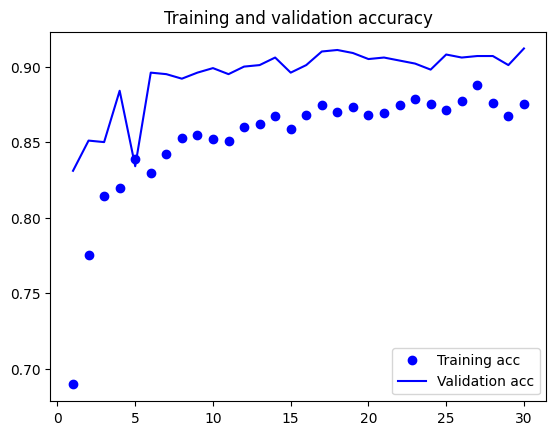

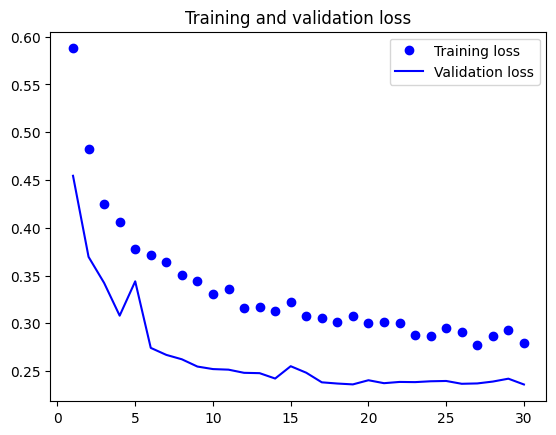

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()